<a href="https://colab.research.google.com/github/Xrantus/CENG463_HW1/blob/main/G03_CENG463_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
#task1:
from ucimlrepo import fetch_ucirepo

# Fetch the heart disease dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease.data.features
Y = heart_disease.data.targets

print("dataset: ")
print(X.head()) #displaying a few rows of dataset.
print("\nChecking any missing values in set")
print(X.isnull().sum())

X_clean = X.fillna(X.mean()) #handling missing datas with mean.
y_clean = Y.iloc[:, 0][X_clean.index]
y = y_clean;


print("\nFeature columns:")
print(X_clean.columns.tolist())
print("\nTarget column:")
print(y_clean)



dataset: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Checking any missing values in set
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Feature columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Target column:
0      0
1      2
2      1
3      0

### **Discussion of task 1**
In task 1 we implement data with using fetch_ucirepo(id=45) from website.
When we check null datas in set we find a few null data.
Because of there are just a few null datas we filled with mean's of datas. So, it does not affect the results not much.
And we are printing data sets.

In [ ]:
# task 2.1
import numpy as np

def pearson_correlation(x, y):
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x**2)
  sum_y2 = np.sum(y**2)
  n = len(x)
  numerator = n * sum_xy - sum_x * sum_y
  denominator = np.sqrt((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))

  if denominator == 0:
    return 0
  else:
    return numerator / denominator

In [ ]:
# task 2.2

feature_correlations = {}
for feature in X_clean.columns:
  correlation = pearson_correlation(X_clean[feature], Y.iloc[:, 0])
  feature_correlations[feature] = correlation

print("feature Correlations: ")
feature_correlations

feature Correlations: 


{'age': 0.22285341927595312,
 'sex': 0.22446851351190594,
 'cp': 0.4070754214982964,
 'trestbps': 0.15775407626368698,
 'chol': 0.07090875545132248,
 'fbs': 0.05918609317619204,
 'restecg': 0.18369634810367966,
 'thalach': -0.41504046173507775,
 'exang': 0.3970573016226745,
 'oldpeak': 0.504091973033799,
 'slope': 0.37795660273378623,
 'ca': 0.5173901884508002,
 'thal': 0.5087985118163867}

In [ ]:
# task 2.3

threshold = 0.3

strong_correlated_features = []


for feature in X_clean.columns:
  if abs(feature_correlations[feature])>threshold:
    strong_correlated_features.append(feature)

print("Features with strong correlation with the target variable:")
strong_correlated_features

Features with strong correlation with the target variable:


['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [ ]:
# task 2.4
max_correlation = 0
most_correlated_feature = None

for feature in X_clean.columns:
  if abs(feature_correlations[feature])> max_correlation:
    max_correlation = abs(feature_correlations[feature])
    most_correlated_feature = feature

print("Most correlated feature with target:",most_correlated_feature," Correlation:",max_correlation)


# We examine the correlation between features and the target because we can find strongest linear relationship.
# if we find important predictors we can built more accurate models to target variable.
# Features with a high correlation with the target can make powerful accurate prediction.
# The advantage for us is that we can build a more accurate and efficient model.
# Because we just use most correlated features It can also more interpretable.



Most correlated feature with target: ca  Correlation: 0.5173901884508002


**Discussion of Task 2: Correlation Analysis**

For this analysis, we computed the Pearson correlation between each feature and the target variable. Features with a correlation above 0.3—such as 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', and 'thal'—were identified as strongly associated with the target. The feature most correlated with the target is 'ca', with a correlation of 0.517, suggesting it has the strongest linear relationship with the target variable. Using these strongly correlated features can improve model performance by focusing on the most predictive attributes.

In [ ]:
# task 3.1 and 3.2

import numpy as np

def linear_regression(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  num= np.sum((x - x_mean) * (y - y_mean))
  den = np.sum((x - x_mean)**2)

  if den == 0:
    b_1 = 0
  else:
    b_1 = num/den

  b_0 = y_mean - b_1 * x_mean

  return b_0, b_1

x = X_clean[most_correlated_feature]



intercept, slope = linear_regression(x, y)

print("b_0:",intercept)
print("b_1:",slope)

b_0: 0.4784302722274663
b_1: 0.6825879287885365


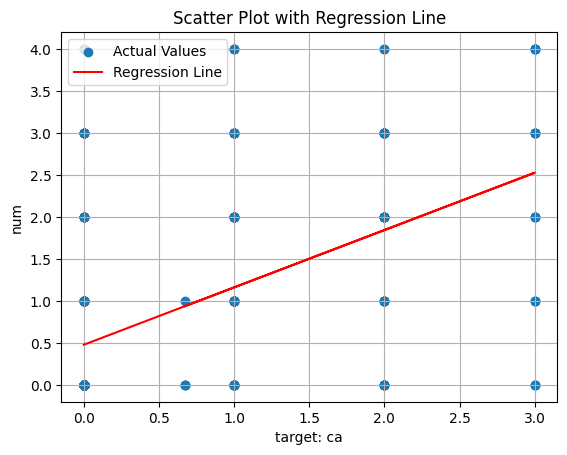

In [ ]:
#task 3.3 and 3.4
import matplotlib.pyplot as plt
def predict_y(x, intercept, slope):
  predicted_y_values = []
  for xValues in x:
    predicted = intercept + slope*xValues
    predicted_y_values.append(predicted)
  return predicted_y_values


predicted_y = predict_y(x, intercept, slope)
plt.figure()
plt.scatter(x, y, label='Actual Values')
plt.plot(x, predicted_y, color='red', label='Regression Line')
plt.xlabel(f"target: {most_correlated_feature}")
plt.ylabel("num")
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

### **Discussion of task 3**
in task 3 we are implenting the linear regression formula in python. it checks for 1/0 error.
x value for most correlated feature's information.
then we calculate the value for this.
After that, we find a prediction with these values.
When we plot graph for prediction. Prediction looks not that good in graph.

In [ ]:
# Task 4.1

def multiple_linear_regression(X, y):
    ones_column = np.ones((X.shape[0], 1))
    X_with_intercept = np.hstack((ones_column, X))
    X_T = X_with_intercept.T
    XTXRev = np.linalg.inv(np.dot(X_T,X_with_intercept))
    XTy = np.dot(X_T,Y)
    beta = np.dot(XTXRev,XTy)
    return beta




In [ ]:
#task 4.2 and 4.3

sorted_features = sorted(feature_correlations.items(), key=lambda item: abs(item[1]), reverse=True)

top_five_features = []

for value in sorted_features[:5]:
  top_five_features.append(value[0])
X_Top_Five = X_clean[top_five_features]
print("Top five most correlated features with the target:\n" + str(sorted_features[:5]))
top_five_features



Top five most correlated features with the target:
[('ca', 0.5173901884508002), ('thal', 0.5087985118163867), ('oldpeak', 0.504091973033799), ('thalach', -0.41504046173507775), ('cp', 0.4070754214982964)]


['ca', 'thal', 'oldpeak', 'thalach', 'cp']

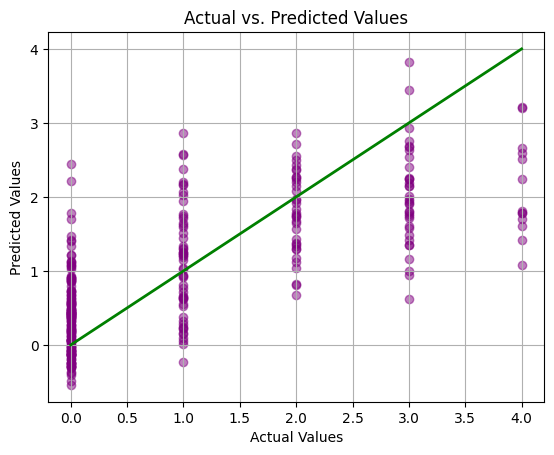

In [ ]:
#task 4.4 and task 4.5
def predict(X_b, beta):

  return np.dot(X_b,beta)

n = len(X_clean)
one_columns = np.ones((n,1))
X_b = np.hstack((one_columns, X_Top_Five))

beta = multiple_linear_regression(X_Top_Five,y_clean)
prediction = predict(X_b, beta.flatten())

plt.figure()

plt.scatter(y, prediction, color='purple', alpha=0.5)
plt.plot([y_clean.min(), y_clean.max()], [y_clean.min(), y_clean.max()], color='green', lw=2)
plt.grid()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [ ]:
#task 4.6

def meanSquaredError(actual_y,predicted_y):
  mse = np.sum((actual_y - predicted_y) ** 2)/len(actual_y)
  return mse
multiple_Regression_MSE = meanSquaredError(y_clean,prediction)
simple_Regression_MSE = meanSquaredError(y,predicted_y)
print("multiple Regression mse:",multiple_Regression_MSE)
print("Simple Regression mse:",simple_Regression_MSE)

multiple Regression mse: 0.6937290090826225
Simple Regression mse: 1.1016237409481322


**Discussion of Task 4: Multiple Linear Regression**

In this task, we developed a multiple linear regression model using the five most correlated features with the target variable: 'ca', 'thal', 'oldpeak', 'thalach', and 'cp'. The regression coefficients were calculated using the normal equation, and predictions were generated. We evaluated the model with Mean Squared Error (MSE), finding that the multiple regression MSE (0.694) was lower than the simple regression MSE (1.102), indicating an improvement in prediction accuracy by using multiple features.

This reduction in error suggests that including multiple strongly correlated features makes the model more suitable for this data, as it captures more variability in the target. The model’s performance improvement confirms the added value of these predictors in representing the target variable more accurately.

In [ ]:
#task 5
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test, y_train, y_test = train_test_split(X_Top_Five,y_clean,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=3000, solver='lbfgs')

model.fit(X_train, y_train)#task5.2

y_prediction5 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction5)

print("accuracy:",accuracy)



accuracy: 0.5573770491803278


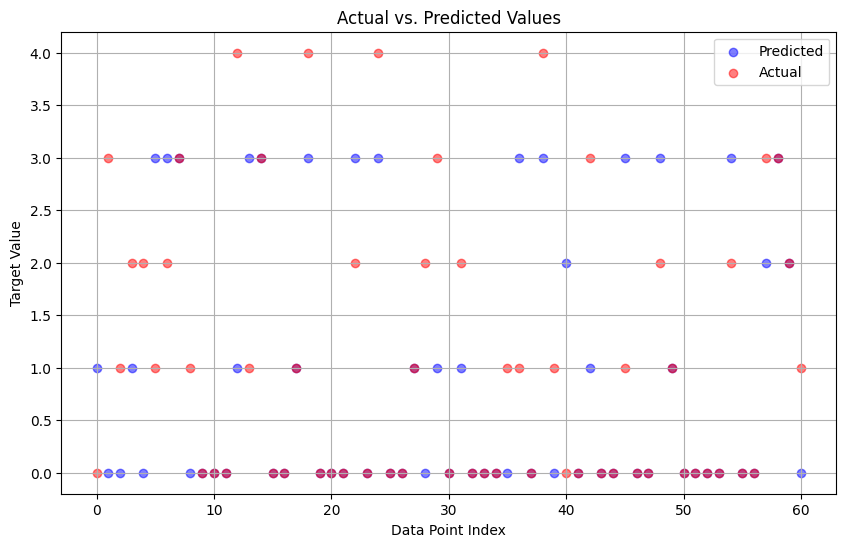

In [ ]:
#task 5.4
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_prediction5)), y_prediction5, color='blue', alpha=0.5, label='Predicted')
plt.scatter(range(len(y_test)), y_test, color='red', alpha=0.5, label='Actual')
plt.xlabel("Data Point Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.title("Actual vs. Predicted Values")
plt.show()


### **Discussion of task 5**
we trained X and y values and fitted with using sckitlearn libraries.
After that accuracy score is calculated as  rouglhy 0.55 this means percantage of our correct predictions.
when we plot this we can see correct predictions and incorrect ones.**bold text**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#task 6.1
X_poly = X_clean[[most_correlated_feature]].values.reshape(-1, 1)
poly_transformer = PolynomialFeatures(degree=2)
X_poly_transformed = poly_transformer.fit_transform(X_poly)

#task 6.2
model = LinearRegression()
model.fit(X_poly_transformed, y_clean)

#task 6.3
y_pred = model.predict(X_poly_transformed)
mse = mean_squared_error(y_clean, y_pred)
print("Mean Squared Error (MSE):", mse)



Mean Squared Error (MSE): 1.0957192152813737


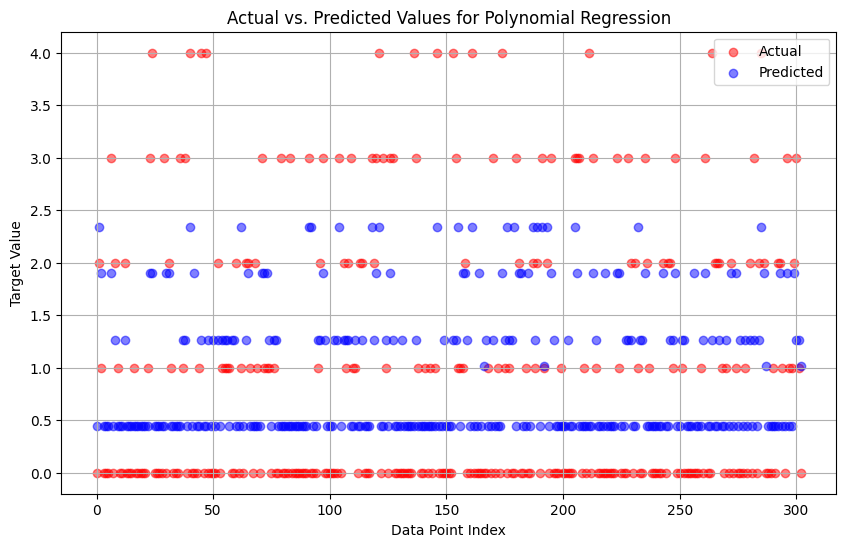

In [ ]:

#task 6.4
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_clean)), y_clean, color='red', alpha=0.5, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='blue', alpha=0.5, label='Predicted')
plt.xlabel("Data Point Index")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values for Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()

**Discussion of Task 6: Polynomial Regression**

In this task, we implemented a polynomial regression model using the most correlated feature, 'ca', transformed to a degree of 2. The model’s Mean Squared Error (MSE) was 1.096, indicating moderate prediction accuracy.

The scatter plot shows that, while the model captures some of the variability, there is still a noticeable discrepancy between actual and predicted values. This suggests that polynomial regression with only one feature may be limited in capturing complex patterns in the data. Further improvements could involve increasing the polynomial degree or incorporating more features to potentially enhance model performance.